<img src="../img/logo_white_bkg_small.png" align="right" />

# PyDrill Demonstration
This notebook demonstrates how to use the PyDrill module to connect to Apache Drill and query data. The complete documentation for PyDrill can be found at http://pydrill.readthedocs.io

The essential steps are:
1.  Import the module
2.  Open a connection to Drill
3.  Execute a query
4.  Do something with the results. 

You will first need to install PyDrill.  This can be done by opening a terminal and typing:
```python
pip install pydrill
```
## Step 1:  Import the PyDrill module
After you've done this, you will be able to import the PyDrill module.

In [1]:
from pydrill.client import PyDrill
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Step 2:  Open a connection to Drill
The next step is to open a connection to Drill.  Once you've opened the connection, you will want to verify that the connection was successfully opened before executing any queries.  PyDrill includes an `is_active()` method for this purpose.

In [2]:
#Open a connection to Drill
drill = PyDrill(host='localhost', port=8047)

#Verify the connection is active, throw an error if not.
if not drill.is_active():
    raise ImproperlyConfigured('Please run Drill first')

## Step 3: Execute a query and get the results
The next and final step is to execute a query in Drill.  When you call the `.query()` method, PyDrill returns an iterable object from which you can extract the rows of your results.  You can also get PyDrill to return a pandas DataFrame. 

In [3]:
#Execute query in Drill
query_result = drill.query('''
SELECT JobTitle, 
AVG( TO_NUMBER( AnnualSalary, '¤' )) AS avg_salary, 
COUNT( DISTINCT `EmpName` ) AS number
FROM dfs.drillclass.`baltimore_salaries_2016.csvh`
GROUP BY JobTitle
Order BY avg_salary DESC
LIMIT 50
''')

#Iterate through the rows.
for row in query_result:
    print( row )

{'number': '1', 'avg_salary': '238772.0', 'JobTitle': "STATE'S ATTORNEY"}
{'number': '1', 'avg_salary': '200000.0', 'JobTitle': 'Police Commissioner'}
{'number': '1', 'avg_salary': '182500.0', 'JobTitle': 'Executive Director V'}
{'number': '1', 'avg_salary': '171635.0', 'JobTitle': 'MAYOR'}
{'number': '10', 'avg_salary': '171306.5', 'JobTitle': 'Executive Director III'}
{'number': '1', 'avg_salary': '169800.0', 'JobTitle': 'CITY SOLICITOR'}
{'number': '1', 'avg_salary': '169800.0', 'JobTitle': 'DIRECTOR PUBLIC WORKS'}
{'number': '1', 'avg_salary': '163000.0', 'JobTitle': 'CITY AUDITOR'}
{'number': '2', 'avg_salary': '154900.0', 'JobTitle': 'Deputy Police Commissioner'}
{'number': '4', 'avg_salary': '153905.0', 'JobTitle': 'Executive Director I'}
{'number': '4', 'avg_salary': '149825.0', 'JobTitle': 'Executive Director IV'}
{'number': '3', 'avg_salary': '146500.0', 'JobTitle': 'Assistant Fire Chief'}
{'number': '1', 'avg_salary': '140800.0', 'JobTitle': 'Chief of Utility Finances'}
{'nu

### Retrieving a DataFrame
You can also get PyDrill to directly return a DataFrame by using the `.to_dataframe()` method of the results object.

In [4]:
df = query_result.to_dataframe()
df.head()

## In Class Exercise:
Using the data in the `dailybots.csv` file use Drill to:
1.  Query the file to produce a summary of infections by day.
2.  Store this data in a dataframe using the `to_dataframe()` method.
3.  Create a line plot of this data by calling the .plot() method on the dataframe

In order to render the plot, you will need to convert the column containing the numeric field into a numeric data type. The command below converts a column called `bot_count` to a floating point number which can be rendered in a line chart.
```python
df['host_count'] = df['host_count'].astype(int)
```

If you are unfamiliar with pandas and the corresponding plotting libraries, the documentation is available here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html.

In [5]:
query_result = drill.query( """SELECT `date`, SUM( CAST(`hosts` AS INT) ) AS host_count
FROM dfs.drillclass.`dailybots.csvh`
GROUP BY `date`
ORDER BY `date`""")

#Get the dataframe
df = query_result.to_dataframe()

#Convert the host count to an integer field
df['host_count'] = df['host_count'].astype(int)

#Sort by the date column
df.sort_values('date', inplace=True, ascending=True)

In [6]:
df.head()

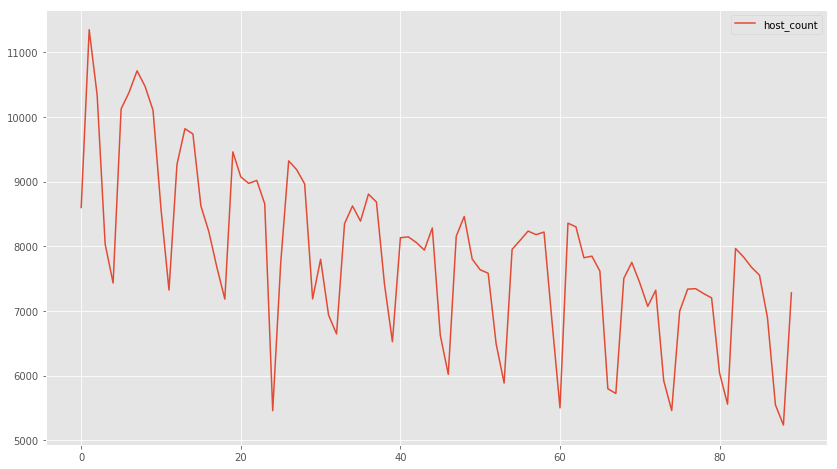

In [7]:
#Plot the data
df.plot(figsize=(14,8))

## Building a Report using Drill and Superset
In this example, we will use a HTTPD logfile and create a report of suspicious activity.  The file `hackers-access.httpd` is a web server log.  

You can read more about this file here: https://github.com/nielsbasjes/logparser/tree/master/examples/demolog

The path `/join_form` is a path which should be unknown to anyone except people trying to break into the site. Using Drill and Superset, create visualizations which answer the following questions:
1. What time of day are people trying to access this page?
2. What browsers are they using?
3. Where are they coming from?